In [1]:
from helpers import * 
from processor import *
from four_complete import *
from graph_checks import *
from four_complete_coordinates import *
from four_complete_locations import *
from four_complete_buffer import *

In [2]:
bottom_data = get_saved_graph_data("BOTTOM")
side_data = get_saved_graph_data()

graph_data = bottom_data


In [3]:
f = FourComplete(graph_data)
f.get_boundary_cyle()
f.generate_dividing_indices()
f.divide_boundary_cycle()
f.ensure_no_cips()
f.paths

ic| 'found cips - contains'
ic| 'found cips - contains reverse'
ic| 'found cips - contains reverse'
ic| 'found cips - contains reverse'


[[5, 4, 0, 8], [8, 3, 2, 7], [7, 6], [6, 5]]

In [4]:
contains_sublist([0, 8, 3, 2], [0, 8, 3, 2])

True

In [5]:
f.cips[0][::-1]

[2, 3, 8, 0]

In [6]:
f.cips

[[0, 8, 3, 2], [4, 5, 6]]

In [7]:
f.boundary

[0, 8, 3, 2, 7, 6, 5, 4]

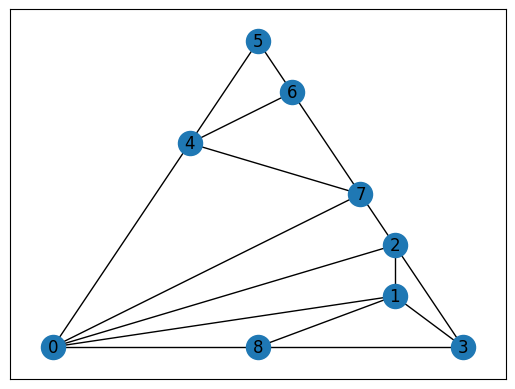

In [8]:
plot_planar(f.G, f.embed)

In [9]:
b = BoundaryCycle(graph_data)
coo = FourCompleteCoordinates(graph_data, f.paths[0], b.boundary_line_string)
shape = Polygon(b.boundary_line_string)
coo.path

/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/bisht2022/helpers.py:123: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2 - y1) / (x2 - x1)
ic| 'flipped'


[5, 4, 0, 8]

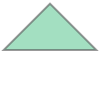

In [10]:
shape

## new approach?

In [11]:
fb = FourCompleteBuffer(graph_data, f.paths[0], b.boundary_line_string)

In [12]:
fb.corner_node_location

(-1.0254596448773625, 0.3195781707919437)

In [13]:
def get_side_point(num):
    d = get_dict_subset(graph_data.embed, f.paths[num])
    l = LineString([Point(i) for i in d.values()])
    pt = l.centroid

    buffer = b.boundary_line_string.buffer(0.5, cap_style="square")

    proj = buffer.boundary.project(pt)
    proj_loc = buffer.boundary.line_interpolate_point(proj)

    lx, ly = points_to_plot(l.coords)
    rx, ry = points_to_plot(pt.coords)
    bx, by = points_to_plot(buffer.boundary.coords)
    px, py = points_to_plot(proj_loc.coords)

    traces = []

    if num == 0:
        traces.append(go.Scatter(x=bx, y=by, mode='markers+lines',))

    traces.append(go.Scatter(x=lx, y=ly, mode='markers+lines', name=num))

    traces.append(go.Scatter(x=rx, y=ry, mode='markers',  marker=dict(color='red'), name=num ))



    traces.append(go.Scatter(x=px, y=py, mode='markers', marker=dict(color='red'),  name=num ))

    return traces

In [14]:
# fig = go.Figure()

# for i in list(range(4)):
#     traces = get_side_point(i)
#     for t in traces:
#         fig.add_trace(t)

# fig.show()

In [15]:
d = get_dict_subset(graph_data.embed, f.paths[0])
l = LineString([Point(i) for i in d.values()])
pt = l.representative_point()


In [16]:
buffer = b.boundary_line_string.buffer(0.5, cap_style="square")

proj = buffer.boundary.project(pt)
proj_loc = buffer.boundary.line_interpolate_point(proj)
proj

1.9578799424087054

In [17]:
lx, ly = points_to_plot(l.coords)
rx, ry = points_to_plot(l.representative_point().coords)
bx, by = points_to_plot(buffer.boundary.coords)
px, py = points_to_plot(proj_loc.coords)

# super quick scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=lx, y=ly, mode='markers+lines',))

fig.add_trace(go.Scatter(x=rx, y=ry, mode='markers',))
fig.add_trace(go.Scatter(x=bx, y=by, mode='markers+lines',))

fig.add_trace(go.Scatter(x=px, y=py, mode='markers',))

In [18]:
shape.contains(coo.orthog_line.centroid)

False

In [19]:
shape.crosses(coo.orthog_line)

False

In [20]:
coo.orthog_line.crosses(shape)

False

## below is working

In [21]:
locs = FourCompleteLocations(copy.deepcopy(graph_data), f.boundary, f.paths, b.boundary_line_string)
locs.run()

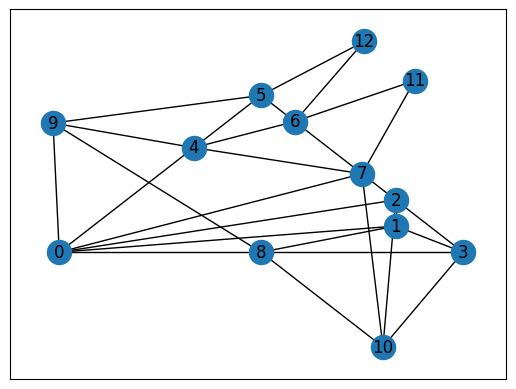

In [22]:
plot_planar(locs.G, locs.embed)

In [23]:
f.paths

[[5, 4, 0, 8], [8, 3, 2, 7], [7, 6], [6, 5]]

In [24]:
f.cips

[[0, 8, 3, 2], [4, 5, 6]]